In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
train = train.sample(n=10000)


# Data Exploration and Visualization

In [ ]:
train.head()

,overall,Review
159532,5,"I have many calibers, and I only have this kit..."
139293,4,I really like these rain pants. I have to driv...
213644,5,Love the mouth grip. It holds the whistle com...
198638,4,I bought this after owning a strada wireless (...
5370,5,This is a great call for the money and Foxpro ...


In [ ]:
train.describe()

,overall
count,10000.000000
mean,4.390300
std,0.983088
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 159532 to 218139
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   overall  10000 non-null  int64 
 1   Review   10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


# Text Processing and Normalization

In [ ]:
df_clean = train.drop_duplicates(subset=['Review'], keep='first')   #duplicates are removed to clean the data
df_clean = df_clean.reset_index(drop=True)

print(df_clean.shape)


(10000, 2)


In [ ]:
train.loc[159532	]

overall                                                    5
Review     I have many calibers, and I only have this kit...
Name: 159532, dtype: object

In [ ]:
train.loc[159532	,'Review']

'I have many calibers, and I only have this kit for cleaning all of them. it can clean from handguns to rifles. Very compact. Worth every dollars The best cleaning kit to me'

In [ ]:

train.loc[159532	,'Review']

'I have many calibers, and I only have this kit for cleaning all of them. it can clean from handguns to rifles. Very compact. Worth every dollars The best cleaning kit to me'

# Vector space Model and feature representation

In [ ]:
tfidf = TfidfVectorizer()                             #the tf-idf vectorizer is introduced and used on the X_train
X_train = tfidf.fit_transform(train['Review'])

In [ ]:
model = LogisticRegression()    #logestic regression is introduced and and run to fit the model
model.fit(X_train, train.overall)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train.duplicated().describe()  # one unique value of false means no duplicate values in train set


count     10000
unique        1
top       False
freq      10000
dtype: object

count vectorizer

In [ ]:
X = list(train['Review'])
y = list(train['overall']) #dataset is split into train and test

vec = CountVectorizer(stop_words='english', ngram_range=(1,1)) # the Count Vectorizer is initiated with the desired parameters, such as the range of n-grams to consider and use the stop word.
X = vec.fit_transform(X)   #The Count Vectorizer is fit on the training set to obtain the feature vectors.

crossval = StratifiedKFold(n_splits=10)



models = {                      #machine learning model is trained using the feature vectors, such as a logistic regression, support vector machine, KNN and MultinomialNB.
    'SVC' : SVC(kernel='linear', random_state=42),
    'KNN' :KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB' : MultinomialNB(),
    'LogisticRegression' : LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42) 
}

#print("Mean Accuracies Stratified KFold Cross-Validation")
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=crossval, n_jobs=-1)    # accuracy, precision are used to evaluate the performance of the model on the test set 
    print(f"{name} Mean Accuracy: {np.mean(scores)}")

SVC Mean Accuracy: 0.5852
KNN Mean Accuracy: 0.6236
MultinomialNB Mean Accuracy: 0.6256
LogisticRegression Mean Accuracy: 0.6315999999999999


tf-idf vectorizer

In [ ]:
X = list(train['Review'])             #Split the dataset into training and test sets.
y = list(train['overall'])

vec = TfidfVectorizer(stop_words='english', ngram_range=(1,1))  #ngram_range is the range of number of words in a sequence
X = vec.fit_transform(X)                #Tfidf Vectorizer with the desired parameters is instantiate the

crossval = StratifiedKFold(n_splits=10)

models = {
    'SVC' : SVC(kernel='linear', random_state=42),
    'KNN' :KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB' : MultinomialNB(),
    'LogisticRegression' : LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42) 
}

print("Mean Accuracies Stratified KFold Cross-Validation")
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=crossval, n_jobs=-1)
    print(f"{name} Mean Accuracy: {np.mean(scores)}")

Mean Accuracies Stratified KFold Cross-Validation
SVC Mean Accuracy: 0.6533
KNN Mean Accuracy: 0.5709
MultinomialNB Mean Accuracy: 0.6309
LogisticRegression Mean Accuracy: 0.6497999999999999


In [ ]:
import seaborn as sns

In [ ]:
X = list(train['Review'])
y = list(train['overall'])

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# function to get the prediction evaluation for each classifier
def get_prediction_score(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification Report of Classifier")
    print(classification_report(y_test, y_pred, zero_division=0))
    print()
    cfm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of Classifier")
    sns.heatmap(cfm, annot=True, fmt='g', cmap='Purples')

# Model training, selection and hyperparameter tuning and evaluation

SVM classifier is run along with the recall, precision, f1-score and support

Classification Report of Classifier
              precision    recall  f1-score   support

           1       0.70      0.14      0.24        49
           2       0.00      0.00      0.00        75
           3       0.48      0.15      0.23       162
           4       0.46      0.21      0.29       428
           5       0.70      0.95      0.81      1286

    accuracy                           0.67      2000
   macro avg       0.47      0.29      0.31      2000
weighted avg       0.61      0.67      0.61      2000


Confusion Matrix of Classifier


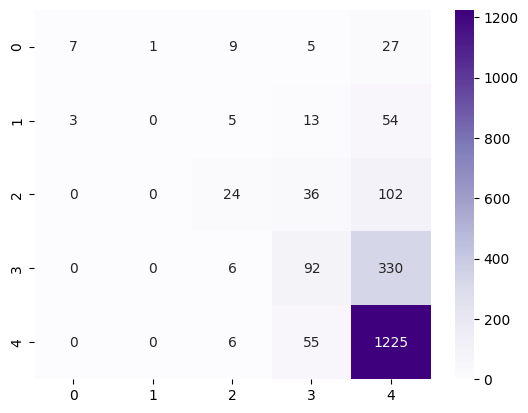

In [ ]:
svc_pipe = Pipeline([
      ('vect', TfidfVectorizer(stop_words='english', ngram_range=(1,1), min_df=2)),
      ('clf', SVC(C=10, kernel='rbf', random_state=42)),
    ])

get_prediction_score(svc_pipe)

In [ ]:
train

,overall,Review
54140,5,It does what its designed for... Protect my gu...
176137,5,Because I ride hard and am a little heavier th...
107268,4,"Does the job, I thought the entire interior wa..."
17224,3,The Blackhawk Tactical Rifle Cheek Pad is OK. ...
159866,5,This little safe is perfect for locking up my ...
...,...,...
214296,5,I bought this tent because I wanted to slim do...
28645,5,These blocks are a great value and just as nic...
123263,3,I mounted this on the bar of my recumbent. Aft...
51963,5,I did my ruger american .308. Did all but barr...


KNN classifier is run along with the recall, precision, f1-score and support

Classification Report of Classifier
              precision    recall  f1-score   support

           1       0.18      0.08      0.11        49
           2       0.00      0.00      0.00        75
           3       0.18      0.07      0.10       162
           4       0.26      0.19      0.22       428
           5       0.67      0.83      0.74      1286

    accuracy                           0.58      2000
   macro avg       0.26      0.23      0.24      2000
weighted avg       0.51      0.58      0.54      2000


Confusion Matrix of Classifier


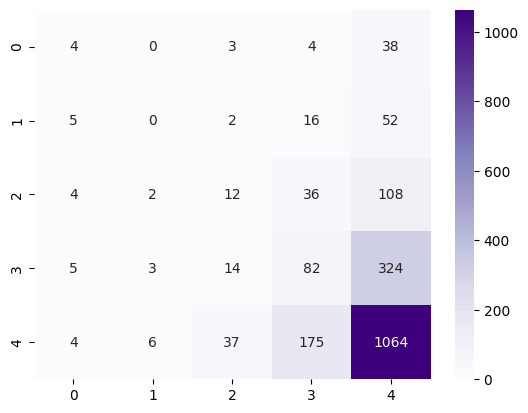

In [ ]:
knn_pipe = Pipeline([                
      ('vect', TfidfVectorizer(stop_words='english', ngram_range=(1,1), min_df=2)),
      ('clf', KNeighborsClassifier(n_neighbors=5)),
    ])

get_prediction_score(knn_pipe)

Naive Bayes Classifier is run along with the recall, precision, f1-score and support

Classification Report of Classifier
              precision    recall  f1-score   support

           1       0.67      0.12      0.21        49
           2       0.00      0.00      0.00        75
           3       0.21      0.04      0.06       162
           4       0.38      0.13      0.19       428
           5       0.68      0.96      0.80      1286

    accuracy                           0.65      2000
   macro avg       0.39      0.25      0.25      2000
weighted avg       0.55      0.65      0.56      2000


Confusion Matrix of Classifier


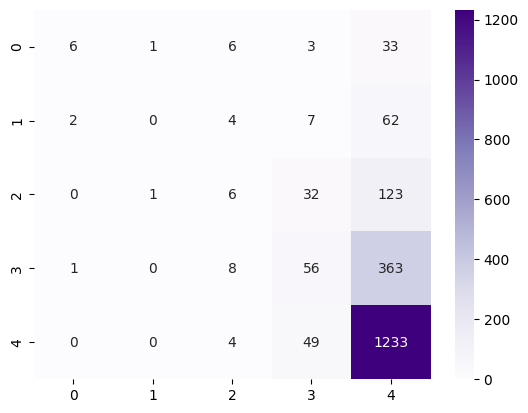

In [ ]:
naive_bayes_pipe = Pipeline([
      ('vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=2)),
      ('clf', MultinomialNB(alpha=0.01)),
    ])

get_prediction_score(naive_bayes_pipe)

logistic regression is run along with the recall, precision, f1-score and support

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report of Classifier
              precision    recall  f1-score   support

           1       0.62      0.20      0.31        49
           2       0.33      0.03      0.05        75
           3       0.37      0.25      0.30       162
           4       0.39      0.32      0.35       428
           5       0.74      0.87      0.80      1286

    accuracy                           0.66      2000
   macro avg       0.49      0.33      0.36      2000
weighted avg       0.62      0.66      0.62      2000


Confusion Matrix of Classifier


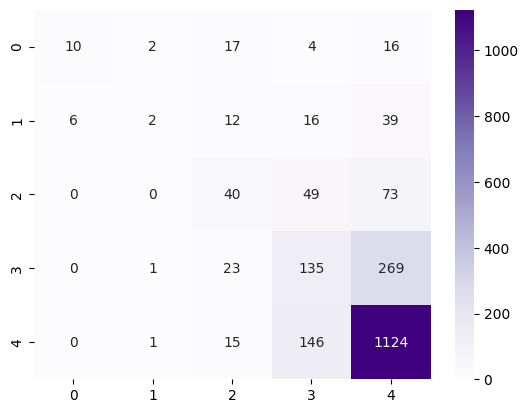

In [ ]:
lr_pipe = Pipeline([
      ('vect', TfidfVectorizer(stop_words='english', ngram_range=(1,1), min_df=1)),
      ('clf', LogisticRegression(C=10, multi_class='multinomial', solver='lbfgs', random_state=42)),
    ])

get_prediction_score(lr_pipe)

# **5. Modeling Text as a Sequence** 

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
train_sample = train.sample(n=10000)

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Embedding, LSTM, SpatialDropout1D, SimpleRNN,Bidirectional, Conv1D,MaxPooling1D 
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Natural Language Processing: tokenization is a part of NLP

In [ ]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(train_sample['Review'].values)
X = tokenizer.texts_to_sequences(train_sample['Review'].values)
X = pad_sequences(X)

# Convert the target variable to a numerical format
y = pd.get_dummies(train_sample['overall']).values


In [ ]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   #the dataset is split into test and train

### **Bi-Directional LSTM**

In [ ]:

# Import necessary modules and functions
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# Create a sequential model
model = Sequential()

# Add an embedding layer with 5000 as the input dimension, 32 as the output dimension, 
# and input length equal to the number of features in the input X data
model.add(Embedding(5000, 32, input_length=X.shape[1]))

# Add a bidirectional LSTM layer with 64 units and 0.2 dropout rate
model.add(Bidirectional(LSTM(64, dropout=0.2)))

# Add a dropout layer with 0.5 rate
model.add(Dropout(0.5))

# Add a dense layer with 5 units and softmax activation function
model.add(Dense(5, activation='softmax'))

# Compile the model with categorical cross-entropy loss function, adam optimizer, 
# and accuracy as the evaluation metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data with 10 epochs, batch size of 64, 
# and validation split of 0.1 (10% of training data used for validation)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test data and print the accuracy
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/10
113/113 [==============================] - 65s 497ms/step - loss: 1.0718 - accuracy: 0.6351 - val_loss: 0.9336 - val_accuracy: 0.6488
Epoch 2/10
113/113 [==============================] - 50s 445ms/step - loss: 0.8518 - accuracy: 0.6669 - val_loss: 0.8880 - val_accuracy: 0.6612
Epoch 3/10
113/113 [==============================] - 45s 395ms/step - loss: 0.7350 - accuracy: 0.7032 - val_loss: 0.8972 - val_accuracy: 0.6550
Epoch 4/10
113/113 [==============================] - 43s 381ms/step - loss: 0.6488 - accuracy: 0.7400 - val_loss: 0.9274 - val_accuracy: 0.6225
Epoch 5/10
113/113 [==============================] - 42s 368ms/step - loss: 0.5812 - accuracy: 0.7671 - val_loss: 0.9910 - val_accuracy: 0.6438
Epoch 6/10
113/113 [==============================] - 59s 526ms/step - loss: 0.5135 - accuracy: 0.7960 - val_loss: 1.0974 - val_accuracy: 0.6388
Epoch 7/10
113/113 [==============================] - 41s 367ms/step - loss: 0.4540 - accuracy: 0.8199 - val_loss: 1.1130 - val_ac

### **1-D Convolutional Neural Network**

In [ ]:


# Import necessary modules and functions
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense

# Create a sequential model
model = Sequential()

# Add an embedding layer with 5000 as the input dimension, 128 as the output dimension, 
# and input length equal to the number of features in the input X data
model.add(Embedding(5000, 128, input_length=X.shape[1]))

# Add a 1D convolutional layer with 64 filters, kernel size of 3, 
# 'same' padding and relu activation function
model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))

# Add a max pooling layer with pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add an LSTM layer with 128 units and 0.2 dropout rate and recurrent dropout rate
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Add a dense layer with 5 units and softmax activation function
model.add(Dense(5, activation='softmax'))

# Compile the model with categorical cross-entropy loss function, adam optimizer, 
# and accuracy as the evaluation metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data with 10 epochs, batch size of 64, 
# and validation split of 0.1 (10% of training data used for validation)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test data and print the accuracy
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))



Epoch 1/10
113/113 [==============================] - 611s 5s/step - loss: 1.0517 - accuracy: 0.6168 - val_loss: 0.9118 - val_accuracy: 0.6325
Epoch 2/10
113/113 [==============================] - 605s 5s/step - loss: 0.8151 - accuracy: 0.6679 - val_loss: 0.8709 - val_accuracy: 0.6388
Epoch 3/10
113/113 [==============================] - 595s 5s/step - loss: 0.6512 - accuracy: 0.7389 - val_loss: 0.8920 - val_accuracy: 0.6275
Epoch 4/10
113/113 [==============================] - 593s 5s/step - loss: 0.5230 - accuracy: 0.7986 - val_loss: 1.0006 - val_accuracy: 0.6212
Epoch 5/10
113/113 [==============================] - 591s 5s/step - loss: 0.4048 - accuracy: 0.8478 - val_loss: 1.1348 - val_accuracy: 0.6275
Epoch 6/10
113/113 [==============================] - 591s 5s/step - loss: 0.3122 - accuracy: 0.8863 - val_loss: 1.3411 - val_accuracy: 0.5863
Epoch 7/10
113/113 [==============================] - 596s 5s/step - loss: 0.2360 - accuracy: 0.9106 - val_loss: 1.6647 - val_accuracy: 0.5800

### **LSTM**

In [ ]:

# Import necessary modules and functions
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preprocessing
train_sample['text'] = train_sample['Review'].apply(lambda x: x.lower()) # Convert text to lowercase
train_sample['text'] = train_sample['text'].str.replace('[^\w\s]','') # Remove punctuation
train_sample['text'] = train_sample['text'].str.replace('\d+','') # Remove numbers

# Initialize Tokenizer with maximum of 5000 words in the vocabulary
tokenizer = Tokenizer(num_words=5000)

# Fit tokenizer on the text data to generate sequences of integers representing each text
tokenizer.fit_on_texts(train_sample['text'].values)

# Convert text data into sequences of integers using the trained tokenizer
X = tokenizer.texts_to_sequences(train_sample['text'].values)

# Pad the sequences to have the same length, using the maximum length of any sequence in the dataset
X = pad_sequences(X)

# Use LabelEncoder to encode the categorical target variable into numerical values
le = LabelEncoder()
y = le.fit_transform(train_sample['overall'].values)

# Train test split the data with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert target variable into one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model architecture using a Sequential model and add layers to it
model = Sequential()

# Add an embedding layer with 5000 as the input dimension, 128 as the output dimension, 
# and input length equal to the number of features in the input X data
model.add(Embedding(5000, 128, input_length=X.shape[1]))

# Add an LSTM layer with 128 units and 0.2 dropout rate and recurrent dropout rate
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Add a dense layer with 5 units and softmax activation function
model.add(Dense(5, activation='softmax'))

# Compile the model with binary cross-entropy loss function, adam optimizer, 
# and accuracy as the evaluation metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data with 10 epochs, batch size of 64, 
# and validation split of 0.1 (10% of training data used for validation)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test data and print the accuracy
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


<ipython-input-21-e62c7ac5239d>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  train_sample['text'] = train_sample['text'].str.replace('[^\w\s]','') # Remove punctuation
<ipython-input-21-e62c7ac5239d>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  train_sample['text'] = train_sample['text'].str.replace('\d+','') # Remove numbers


Epoch 1/10
113/113 [==============================] - 1204s 11s/step - loss: 0.3791 - accuracy: 0.6256 - val_loss: 0.3518 - val_accuracy: 0.6350
Epoch 2/10
113/113 [==============================] - 1167s 10s/step - loss: 0.3259 - accuracy: 0.6404 - val_loss: 0.3123 - val_accuracy: 0.6500
Epoch 3/10
113/113 [==============================] - 1157s 10s/step - loss: 0.2719 - accuracy: 0.6861 - val_loss: 0.3144 - val_accuracy: 0.6438
Epoch 4/10
113/113 [==============================] - 1155s 10s/step - loss: 0.2384 - accuracy: 0.7325 - val_loss: 0.3233 - val_accuracy: 0.6475
Epoch 5/10
 31/113 [=======>......................] - ETA: 13:45 - loss: 0.2104 - accuracy: 0.7697

### **Recurrent Neural Network**

In [ ]:
 
 
 # Define the RNN model architecture
model = Sequential()
model.add(Embedding(5000, 128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(SimpleRNN(128))
model.add(Dense(5, activation='softmax'))

# Compile the model and specify the loss function and optimization algorithm
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the testing set
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
113/113 [==============================] - 347s 3s/step - loss: 1.0673 - accuracy: 0.6250 - val_loss: 1.0489 - val_accuracy: 0.6350
Epoch 2/10
113/113 [==============================] - 351s 3s/step - loss: 0.9329 - accuracy: 0.6490 - val_loss: 0.9643 - val_accuracy: 0.6413
Epoch 3/10
113/113 [==============================] - 340s 3s/step - loss: 0.6709 - accuracy: 0.7549 - val_loss: 1.0128 - val_accuracy: 0.6388
Epoch 4/10
113/113 [==============================] - 336s 3s/step - loss: 0.4373 - accuracy: 0.8479 - val_loss: 1.1535 - val_accuracy: 0.6137
Epoch 5/10
113/113 [==============================] - 328s 3s/step - loss: 0.2600 - accuracy: 0.9192 - val_loss: 1.3215 - val_accuracy: 0.5725
Epoch 6/10
113/113 [==============================] - 332s 3s/step - loss: 0.6379 - accuracy: 0.7793 - val_loss: 1.1951 - val_accuracy: 0.5938
Epoch 7/10
113/113 [==============================] - 334s 3s/step - loss: 0.9033 - accuracy: 0.6821 - val_loss: 0.9922 - val_accuracy: 0.6413

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

NameError: ignored

In [ ]:
# We are using BiLSTM to predict

import pandas as pd
import numpy as np



# Preprocess text data for input to neural network
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load tokenizer and settings used to preprocess training data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train["Review"])
maxlen = 5482 # maximum length of sequence in training data

# Apply same tokenizer and padding settings to test data
test_sequences = tokenizer.texts_to_sequences(test_data["Review"])
test_padded = pad_sequences(test_sequences, maxlen=maxlen)

predictions = model.predict(test_padded)



2316/2316 [==============================] - 267s 115ms/step


In [ ]:
y_pred_class = np.argmax(predictions, axis=1)


In [ ]:

# Save predictions to a file
np.savetxt("/content/drive/MyDrive/predictions.csv", y_pred_class, delimiter=",")

In [ ]:
test_data["predicted_overall"] = y_pred_class

In [ ]:
test_data

,id,Review,predicted_overall
0,0,Bought for a Smith and Wesson M&P15 fits perfe...,2
1,1,Beware of the charts listed on Butler Creek's ...,4
2,2,I've only used this once to sight in a scope. ...,3
3,3,I need more of these!!! This thing makes shoot...,4
4,4,Grabber Outdoors Original Space Brand Sportsma...,4
...,...,...,...
74076,74076,My first foray into the electronic earmuff re...,4
74077,74077,The Callaway Hex Chrome Golf Ball is a nice pr...,4
74078,74078,Got these beanies for my husband and brother. ...,4
74079,74079,I purchased this utility knife for work and it...,0


In [ ]:
report = classification_report(y_pred_class, y_pred_class.round())

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      1.00      1.00       599
           2       1.00      1.00      1.00      8167
           3       1.00      1.00      1.00     17289
           4       1.00      1.00      1.00     47291

    accuracy                           1.00     74081
   macro avg       1.00      1.00      1.00     74081
weighted avg       1.00      1.00      1.00     74081



In [ ]:
report = classification_report(y_test, y_test.round())

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00       428
           4       1.00      1.00      1.00      1281

   micro avg       1.00      1.00      1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 samples avg       1.00      1.00      1.00      2000



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Topic Modeling

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
train = train.sample(n=10000)

In [ ]:
train

,overall,Review
84241,5,I have found more uses for this stuff than I w...
9263,5,I recently became reacquainted with mountain b...
122218,5,Great clear scope. Needs either a riser of abo...
35020,5,This Oil is the tried and true from times past...
51143,5,I had on my bike so I bought for my wife who c...
...,...,...
190091,5,this knife is the the best blade i have ever h...
124608,4,It holds my polar insulated 20oz perfect. Simp...
56460,5,"If you can find a better scope for 14 dollars,..."
2853,2,"While I do like its design, the quality is ano..."


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Preprocessing the data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower().strip()) # remove punctuation and convert to lowercase
    text = re.sub(r'\s+', ' ', text) # remove extra whitespaces
    text = ' '.join([word for word in text.split() if word not in stop_words]) # remove stop words
    return text

train['preprocessed_review'] = train['Review'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Vectorizing the text data
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=1000, ngram_range=(1, 2))
X = vectorizer.fit_transform(train['preprocessed_review'])

# Extracting feature names
feature_names = vectorizer.get_feature_names_out()

# Training the LDA model
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=42)
lda_model.fit(X)

# Printing the topics
for topic_idx, topic in enumerate(lda_model.components_):
    print(f'Top 10 words for Topic #{topic_idx}:')
    print([feature_names[i] for i in topic.argsort()[:-11:-1]])
    print('\n')


Top 10 words for Topic #0:
['water', 'fit', 'comfortable', 'bit', 'real', 'cold', 'feel', 'cover', 'cap', 'wear']


Top 10 words for Topic #1:
['knife', 'blade', 'good', 'sharp', 'handle', 'knives', 'steel', 'sheath', 'edge', 'value']


Top 10 words for Topic #2:
['scope', 'bottle', 'gun', 'holster', 'belt', 'water', 'watch', 'pump', 'great', 'pistol']


Top 10 words for Topic #3:
['great', 'bag', 'size', 'perfect', 'fit', 'large', 'price', 'small', 'looking', 'nice']


Top 10 words for Topic #4:
['product', 'good', 'quality', 'great', 'price', 'bought', 'buy', 'like', 'item', 'years']


Top 10 words for Topic #5:
['great', 'works', 'good', 'work', 'use', 'like', 'works great', 'product', 'little', 'pretty']


Top 10 words for Topic #6:
['tool', 'pack', 'target', 'gloves', 'pocket', 'tools', 'straps', 'fits', 'trigger', 'laser']


Top 10 words for Topic #7:
['easy', 'use', 'set', 'mount', 'sight', 'rifle', 'time', 'range', 'install', 'work']


Top 10 words for Topic #8:
['light', 'like

In [ ]:
topics = lda_model.transform(X)
topics_dict = {i: f'Topic {i}' for i in range(10)}
map_topic = np.vectorize(topics_dict.get)
train['Topic'] = map_topic(topics.argmax(axis=1)).astype(str)


# Saving the preprocessed and topic-assigned data to a new CSV file
train[['overall', 'Review', 'Topic']].to_csv('/content/drive/MyDrive/processed_train.csv', index=False)

In [ ]:

processed_train = pd.read_csv('/content/drive/MyDrive/processed_train.csv')
print(processed_train.head())

   overall                                             Review    Topic
0        5  I have found more uses for this stuff than I w...  Topic 3
1        5  I recently became reacquainted with mountain b...  Topic 0
2        5  Great clear scope. Needs either a riser of abo...  Topic 2
3        5  This Oil is the tried and true from times past...  Topic 5
4        5  I had on my bike so I bought for my wife who c...  Topic 4


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

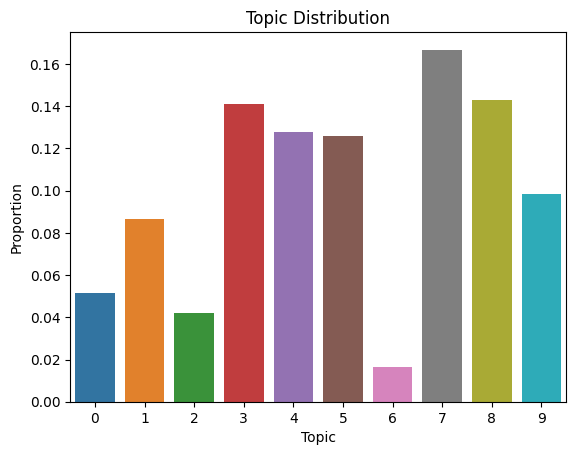

In [ ]:
# Calculate the topic distribution across all reviews
topic_dist = processed_train['Topic'].str.replace('Topic ', '').astype(int).value_counts(normalize=True).sort_index()


# Create a bar plot of the topic distribution
sns.barplot(x=list(range(10)), y=topic_dist)
plt.xlabel('Topic')
plt.ylabel('Proportion')
plt.title('Topic Distribution')
plt.show()
